In [1]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

from load_graph import *

In [10]:
def communities(comms):
    communities = defaultdict(set)
    for i, coms in enumerate(comms):
        for c in coms:
            communities[c].add(i)
    return list(communities.values())

def get_overlap_densities(g, coms, LARGE=25):
    large_overlaps = set()
    for i in range(len(coms)):
        for j in range(i):
            if len(coms[i].intersection(coms[j])) >= LARGE:
                large_overlaps.add((i,j))

    small_density = []
    large_density = []
    intersection_density = []
    for k, (i,j) in enumerate(large_overlaps):
        if len(coms[i]) < len(coms[j]):
            small_com = coms[i]
            large_com = coms[j]
        else:
            small_com = coms[j]
            large_com = coms[i]
        intersection = small_com.intersection(large_com)
        
        for c, data in zip([small_com, large_com, intersection], [small_density, large_density, intersection_density]):
            sg = g.subgraph(c)
            density = 2*sg.ecount() / (sg.vcount()*(sg.vcount())-1)
            data.append(density)
    return small_density, large_density, intersection_density


def make_plot(graph_name, d, rhos, LARGE=25):
    small_densities = []
    large_densities = []
    intersection_densities = []

    for rho in tqdm(rhos):
        g, coms = load_abcdoo(f"{graph_name}_d{d}_rho{rho}_edge.dat", f"{graph_name}_d{d}_rho{rho}_com.dat")
        s,l,i = get_overlap_densities(g, coms, LARGE=LARGE)
        small_densities.append(s)
        large_densities.append(l)
        intersection_densities.append(i)
    
    ms = np.array([np.mean(x) for x in small_densities])
    ml = np.array([np.mean(x) for x in large_densities])
    mi = np.array([np.mean(x) for x in intersection_densities])

    stds = np.array([np.std(x) for x in small_densities])
    stdl = np.array([np.std(x) for x in large_densities])
    stdi = np.array([np.std(x) for x in intersection_densities])

    plt.plot(rhos, ms, label="Small")
    plt.plot(rhos, ml, label="Large")
    plt.plot(rhos, mi, label="Intersection")

    plt.fill_between(rhos, ms-stds, ms+stds, alpha=0.33)
    plt.fill_between(rhos, ml-stdl, ml+stdl, alpha=0.33)
    plt.fill_between(rhos, mi-stdi, mi+stdi, alpha=0.33)

    plt.legend()
    plt.xlabel(r"$\rho$")
    plt.ylabel("Density")
    plt.title("Rho vs. (Large) Overlap Density")

100%|██████████| 11/11 [00:26<00:00,  2.43s/it]


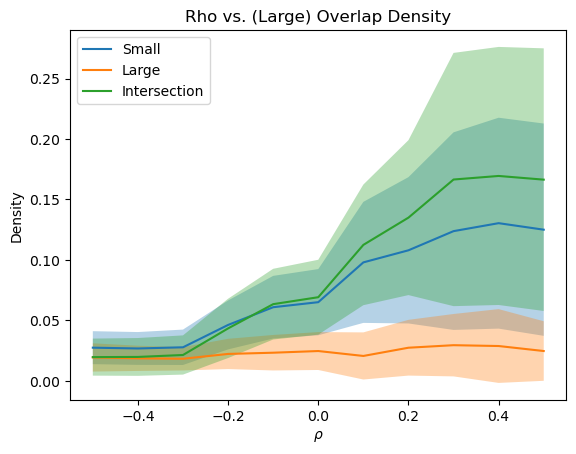

In [11]:
d=2
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos)

100%|██████████| 11/11 [00:25<00:00,  2.33s/it]


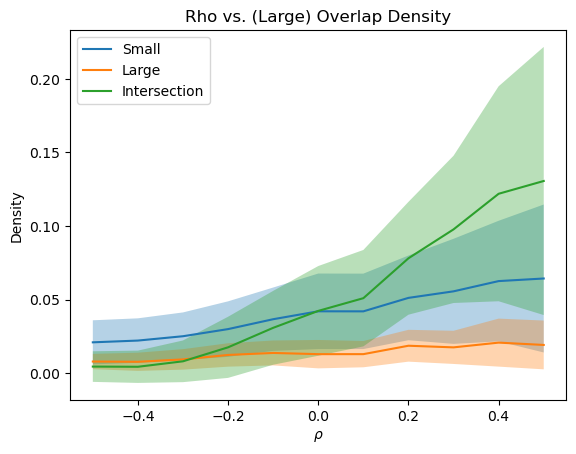

In [12]:
d=5
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos)

100%|██████████| 11/11 [00:28<00:00,  2.60s/it]


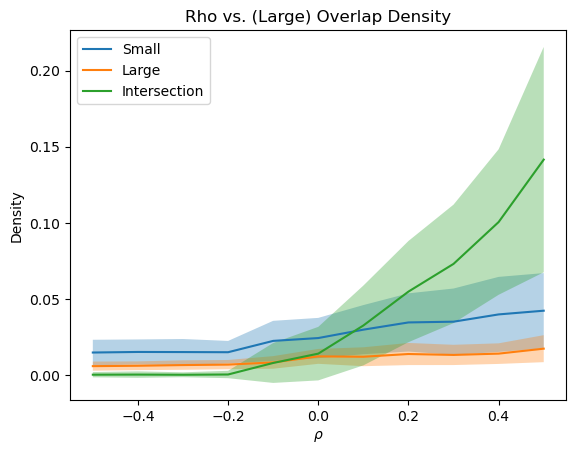

In [13]:
d=10
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos)